In [25]:
#import time-series from .csv file
import pandas as pd
df1 = pd.read_csv("/home/just/Scaricati/feed_53.MYD.csv",nrows=10000)
x = df1.iloc[:,0]
y = df1.iloc[:,1]

In [26]:
#split data into train and set with ratio of 70%/30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0,shuffle = False)

In [27]:
#prepare linear regressor
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#train the model and make prediction
regressor.fit(X_train.values.reshape(-1,1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1,1))

In [28]:

#evaluate results
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()


Mean Absolute Error: 3.7288193734485704
Mean Squared Error: 21.768853760470705
Root Mean Squared Error: 4.665710423983759


,Actual,Predicted
7000,800.049011,805.616953
7001,800.049011,805.623021
7002,800.049011,805.629156
7003,800.049011,805.634927
7004,800.049011,805.641028


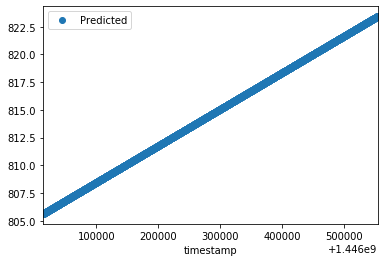

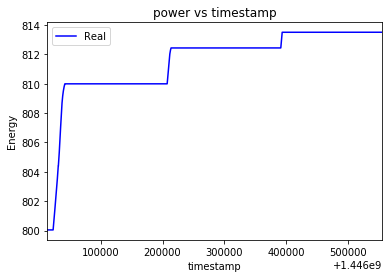

In [29]:
#plot predicted and real results and compare them
%matplotlib inline
df2= pd.DataFrame({'timestamp': X_test,'' 'Predicted': y_pred, 'Real' : y_test})
import matplotlib.pyplot as plt
df2.plot(x='timestamp', y='Predicted', style='o')
df2.plot(x='timestamp', y='Real', style='b')
plt.title('power vs timestamp')
plt.xlabel('timestamp')
plt.ylabel('Energy')
plt.show()